# Klasyfikacja jakości wina wg właściwości fizykochemicznych

Amadeusz Bubniak, Tomasz Hotloś

## Zbiór danych

Wykorzystany zbiór danych pochodzi z [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality) (zestaw z danymi dotyczącymi wina czerwonego) i opisuje zależność jakości wina od wybranych właściwości fizykochemicznych

### Dane wejściowe

* **fixed acidity** – kwasowość określona,
* **volatile acidity** – kwasowość lotna,
* **citric acid** – zawartość kwasu cytrynowego,
* **residual sugar** – cukier resztkowy,
* **chlorides** – chlorki,
* **free sulfur dioxide** – zawartość wolnego dwutlenku siarki,
* **total sulfur dioxide** – całkowita zawartość dwutlenku siarki
* **density** – gęstość,
* **pH** – pozycja na skali pH (zasadowość/kwasowość),
* **sulphates** – siarczany,
* **alcohol** – zawartość alkoholu.

### Dane wyjściowe

* **quality** – jakość w skali od 0 do 10.

Zbiór zawiera 1599 rekordów.

In [1]:
import pandas as pd

df = pd.read_csv('dataset/winequality-red.csv', sep=';')

print(f"Liczba rzędów: {df.shape[0]}, liczba kolumn: {df.shape[1]}")
df.head()

Liczba rzędów: 1599, liczba kolumn: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Wizualizacja danych i wstępna analiza

[5 6 7 4 8 3]
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


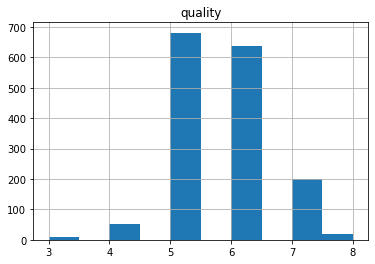

In [2]:
# Jakość wina
df.hist(column='quality')

print(df['quality'].unique())

print(df['quality'].describe())

print(df['quality'].value_counts())

Na podstawie histogramu i statystyk opisowych dla wartości `quality` możemy zaobserwować, że klasa jakości jest w dużym stopniu niezbalansowana (zdecydowanie najwięcej jest wartości ze środka zakresu). Zarówno mediana, jak i trzeci kwartyl mają wartość 6. Oceny 5 i 6 przypisane są ponad 75% rekordom ze zbioru danych.

Oceny jakości wina mają zakres od 3 do 8.

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

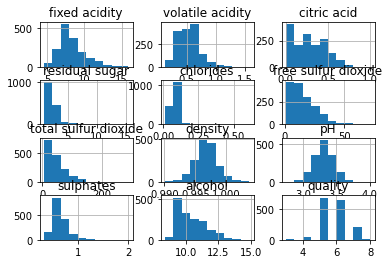

In [4]:
df.hist()

Wygląd histogramów i wartości kwartyli wskazują, że w przypadku zawartości chlorków, siarczanów oraz cukru resztkowego możemy mieć do czynienia z mocno odstającymi danymi.

Chlorki: przeciętna wartość - 2.2, maksymalna - 15.5
Siarczany: 0.62, 2.0
Cukier resztkowy: 2.2, 15.5

### Wykres wartości odstających dla zawartości chlorków, siarczanów oraz cukru resztkowego

C:\Users\bambi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chlorides'>

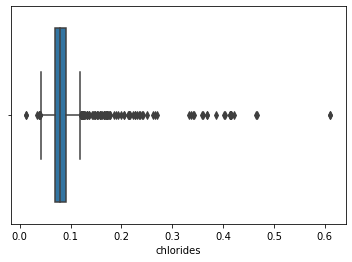

In [5]:
import seaborn

seaborn.boxplot(df['chlorides'])

C:\Users\bambi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sulphates'>

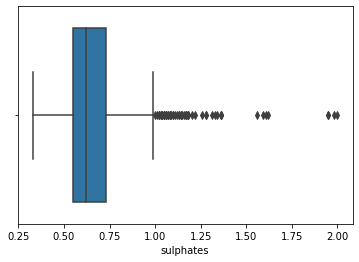

In [6]:
seaborn.boxplot(df['sulphates'])

C:\Users\bambi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

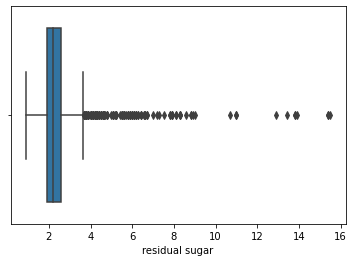

In [7]:
seaborn.boxplot(df['residual sugar'])

Przed dalszym przetwarzaniem może być konieczne usunięcie wartości odstających dla zmiennych przedstawionych powyżej lub standardyzacja danych ze względu na potencjalny negatywny wpływ na pracę modelu.

### Macierz korelacji

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

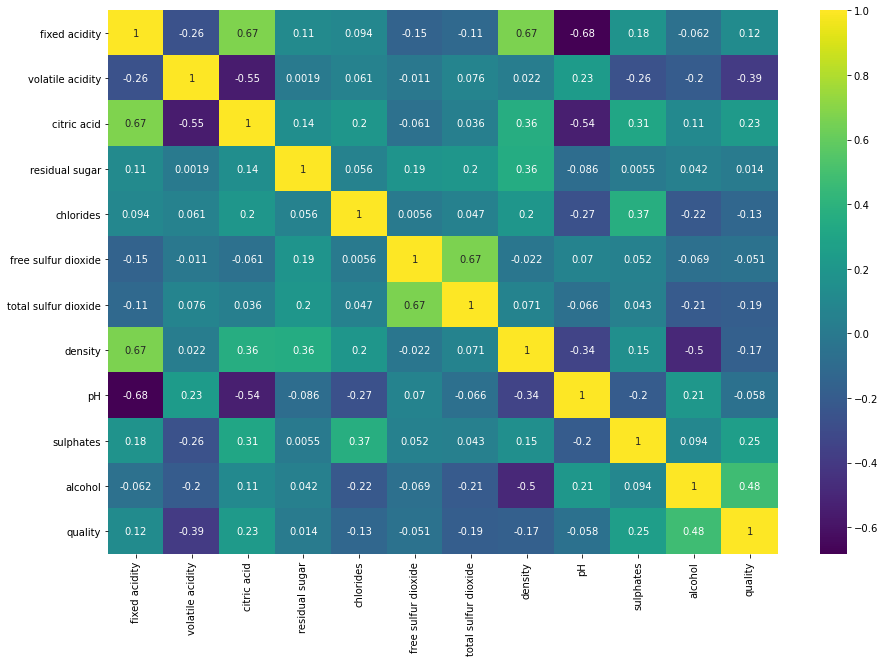

In [9]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 10))
seaborn.heatmap(df.corr(), annot=True, cmap='viridis')

Analizując macierz korelacji, możemy od razu zauważyć pewne cechy, które są w pewnym stopniu skorelowane z jakością wina:

* zawartość alkoholu (0.48) - średnia pozytywna korelacja,
* zawartość siarczanów (0.25) - słaba pozytywna korelacja,
* kwasowość lotna (-0.39) - średnia negatywna korelacja.

Pozycja na skali pH, zawartość cukru resztkowego oraz zawartość wolnego dwutlenku siarki nie mają korelacji z jakością wina.

## Wstępne przetwarzanie danych

Aby uzyskać jak najprzydatniejsze wyniki z modelu, należy przetworzyć dane: przeanalizować brakujące wartości, przeskalować i ustandaryzować cechy, w razie potrzeby zredukować wymiarowość.

### Brakujące dane

In [10]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Wybrany zbiór nie ma brakujących wartości, dzięki czemu nie musimy stosować technik wstawiania brakujących danych (np. wg średniej, wg mediany, wg dominanty, zastąpienie zerami, generowanie losowe, regresja, algorytm k-nn).

### Skalowanie cech

W pierwszej kolejności, przed skalowaniem cech, przeskztałcamy zbiór danych tak, by zawarte informacje mogły być analizowane jako problem klasyfikacji, tj. przekształcając wartość `quality` na wartość binarną. Przyjmujemy, że wina dobrej jakości otrzymały ocenę większą od lub równą 7.

Następnie rozdzielamy dane na wejściowe i wyjściowe.

Do przeskalowania wykorzystano `StandardScaler` (`μ = 0` i `σ = 1` dla każdej kolumny z osobna)

In [17]:
df['good'] = [1 if x >= 7 else 0 for x in df['quality']]

X = df.drop(['quality', 'good'], axis=1)
y = df['good']

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
y.value_counts()

0    1382
1     217
Name: good, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler

X_unscaled = X
X = StandardScaler().fit_transform(X)

pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-1.527511e-17,-8.956771e-17,4.549207e-16,-8.241618e-17,8.658212e-17,1.610136e-16,1.094427e-16,5.182429e-16,-2.129490e-16,9.212152e-17,9.226169e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>, <AxesSubplot:>]],
      dtype=object)

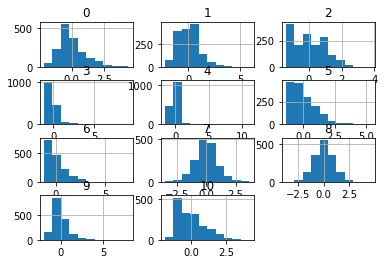

In [23]:
pd.DataFrame(X).hist()

### Analiza głównych składowych (PCA)

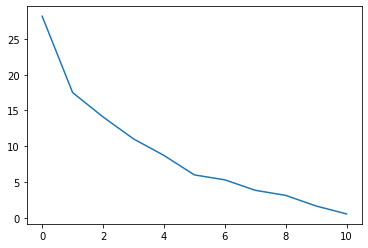

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca_fit = pca.fit(X)
pca_transform = pca_fit.transform(X)

plt.plot(pca_fit.explained_variance_ratio_ * 100)
plt.show()

7 pierwszych składowych jest w stanie wyjaśnić ok. 95% wariancji w zbiorze danych.

In [29]:
X_pca = pd.DataFrame(X[:, :7])

X_pca.head()

,0,1,2,3,4,5,6
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133


In [ ]:
# TODO model